# Importing Libraries

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

# Reading the data

In [53]:
url = "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
data = pd.read_csv(url)

In [54]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [55]:
data.shape

(1599, 12)

# Selecting the input and output features for regression tasks

In [56]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [57]:
target = ['quality']

# Checking for any null values in the dataset

In [58]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Normalize Dataset

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(data.iloc[:,0:-1])
normal_df = pd.DataFrame(normal_df, columns = data.iloc[:,0:-1].columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  


# Fixing Imbalanced Dataset

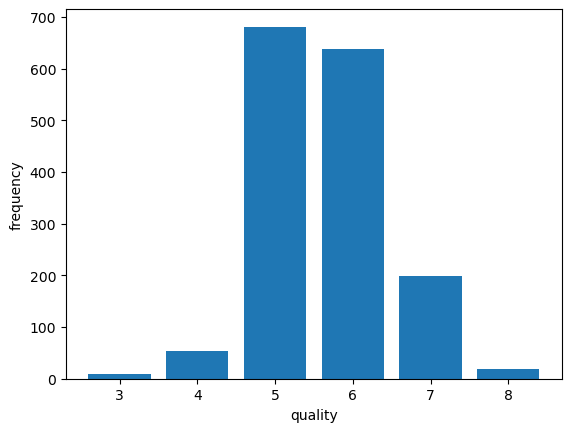

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [60]:
quality_dist = data['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

In [61]:
data['quality'] = data['quality'].map({
        3 : 0,
        4 : 0,
        5 : 1,
        6 : 1,
        7 : 2,
        8 : 2         
})

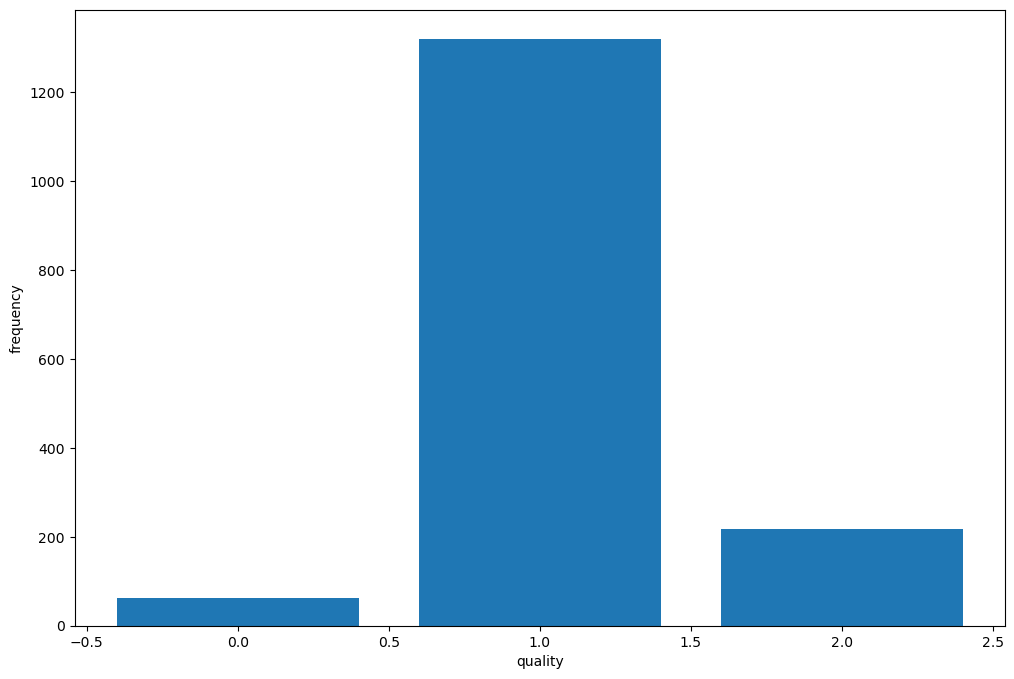

1    1319
2     217
0      63
Name: quality, dtype: int64


In [62]:
fig, ax = plt.subplots(figsize=(12,8))
quality_dist = data['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

In [63]:
sme = SMOTETomek(random_state=42)
X_resampled, y_resampled = sme.fit_resample(normal_df, data['quality'])

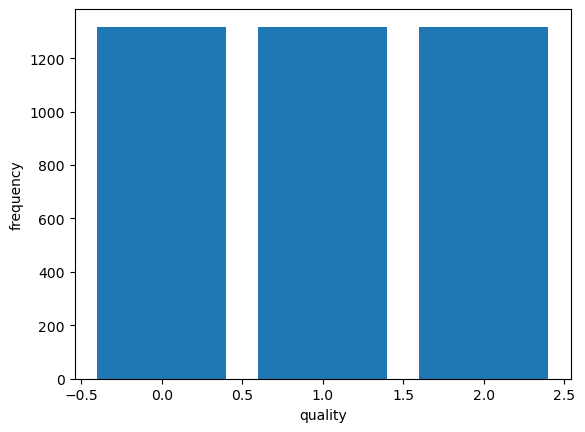

2    1318
0    1317
1    1316
Name: quality, dtype: int64


In [64]:
quality_dist = y_resampled.value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

In [65]:
class Percent(float):
    def __str__(self):
        return '{:.2%}'.format(self)

# Perform K-fold Cross Validation

In [66]:
maxDeep = [3,6,9,12,15]

kf = KFold(n_splits=5, random_state=67, shuffle=True)
kf.get_n_splits(X_resampled,y_resampled)

print(kf)
print(maxDeep)

modelIndex = 1
for train_index, test_index in kf.split(X_resampled):
    print("---------------------------")
    print("MODEL", modelIndex)
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    print("train vs test",Percent((len(X_train)/(len(X_resampled)))),len(X_train),Percent((len(X_test)/(len(X_resampled)))),len(X_test))
    for n in maxDeep :
      print("maxDeep", n)
      regressor = tree.DecisionTreeRegressor(max_depth=n)
      regressor = regressor.fit(X_train, y_train)
      regressor_predict = regressor.predict(X_test)
      print("RMSE:",sqrt(mean_squared_error(y_true=y_test, y_pred=regressor_predict)))
      print("MSE:",mean_squared_error(y_true=y_test, y_pred=regressor_predict))   
      print("MAE:",mean_absolute_error(y_true=y_test, y_pred=regressor_predict))
    modelIndex=modelIndex+1


KFold(n_splits=5, random_state=67, shuffle=True)
[3, 6, 9, 12, 15]
---------------------------
MODEL 1
train vs test 79.98% 3160 20.02% 791
maxDeep 3
RMSE: 0.529838894935456
MSE: 0.2807292545864252
MAE: 0.44060386292036735
maxDeep 6
RMSE: 0.4337448047462435
MSE: 0.18813455564435688
MAE: 0.29354624284845254
maxDeep 9
RMSE: 0.3828252429699793
MSE: 0.14655516665502366
MAE: 0.197824933547394
maxDeep 12
RMSE: 0.3737023183070196
MSE: 0.13965342270804101
MAE: 0.14549077273054542
maxDeep 15
RMSE: 0.3816864077855173
MSE: 0.1456845138882122
MAE: 0.14496531838801488
---------------------------
MODEL 2
train vs test 80.01% 3161 19.99% 790
maxDeep 3
RMSE: 0.5087801759487504
MSE: 0.25885726743844134
MAE: 0.42001631612371787
maxDeep 6
RMSE: 0.40710774650095627
MSE: 0.16573671726108685
MAE: 0.28595205855367256
maxDeep 9
RMSE: 0.37669380205807595
MSE: 0.14189822050896891
MAE: 0.20620905406839882
maxDeep 12
RMSE: 0.3681274935508796
MSE: 0.1355178515080529
MAE: 0.1527949330517222
maxDeep 15
RMSE: 0.35169

### Retrain Model On Whole Dataset

In [67]:
regressor = regressor.fit(X_resampled, y_resampled)
regressor_predict = regressor.predict(X_test)

# Display Final Tree

In [68]:
def makeTree(regs):
  treeGrasps = []
  dot_data = StringIO()
  export_graphviz(regs, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True, feature_names = features)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  treeGrasps.append(graph)
  return treeGrasps

treeGrasps= makeTree(regressor)


In [69]:
treeGrasps[0].write_png('wine quality.png')
Image(treeGrasps[0].create_png())